<h2><font color="#004D7F" size=6>Módulo 7. Proyectos de Machine Learning</font></h2>



<h1><font color="#004D7F" size=5>2. Proyecto de clasificación binaria</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Importar librerías](#section11)
    * [2.1. Cargar el dataset](#section12)
* [2. Estadística descriptiva](#section2)
    * [2.1. Dimensiones del dataset](#section21)
    * [2.2. Visualización de datos](#section22)
    * [2.3. Resumen estadístico](#section23)
    * [2.4. Distribución de clase](#section24)
    * [2.5. Tipo de datos](#section25)
* [3. Visualización del dataset](#section3)
    * [3.1. Gráficos Univariado](#section31)
    * [3.2. Gráficos multivariados](#section32)
* [4. Fase de modelado](#section4)
    * [4.1. Crear conjunto de validación](#section41)
    * [4.2. Evaluación de línea base](#section42)
    * [4.3. Evaluar modelos: estandarización](#section43)
* [5. Fase de Optimización](#section5)
    * [5.1. Optimización de k-NN](#section51)
    * [5.2. Optimización de SVM](#section52)
* [6. Agoritmos ensamblados](#section6)
* [7. Fase de forecasting](#section7)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

/tmp/ipykernel_19953/1126351303.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


El enfoque de este proyecto será el conjunto de datos [Sonar Mines vs Rocks](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)). El problema es predecir objetos de metal o roca a partir de los datos de retorno de la sonda. Cada patrón es un conjunto de 60 números en el rango de 0.0 a 1.0. Cada número representa la energía dentro de una banda de frecuencia particular, integrada durante un cierto período de tiempo. La etiqueta asociada con cada registro contiene la letra "R" si el objeto es una roca y "M" si es una mina (cilindro de metal). Los números en las etiquetas están en orden creciente de ángulo de aspecto, pero no codifican el ángulo directamente.


<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

Primero, importemos todos los módulos, funciones y objetos que vamos a utilizar en este tutorial.

In [1]:
# Classification Project: Sonar rocks or mines

# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

El conjunto de datos de Sonar se puede descargar desde el repositorio de UCI Machine Learning.

In [2]:
# Load dataset
filename = 'data/sonar.all-data.csv'
dataset = pd.read_csv(filename, header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

Ahora es el momento de estudiar nuestros datos. En este paso vamos a echar un vistazo a los datos de varias maneras diferentes:
* Dimensiones del conjunto de datos.
* Visualización de datos.
* Resumen estadístico de todos los atributos.
* Desglosar las instancias en cada clase.
* Tipo de atributos

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos con la propiedad `shape`. 

In [3]:
# shape
dataset.shape

(208, 61)

Puede verse 208 instancias y 61 atributos (incluyendo la clase).

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Visualización de datos</font>

También siempre es una buena idea ver como están representados los datos con la función `head()`

In [4]:
# head
pd.set_option('display.width', 100)
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Podemos ver las primeras 5 filas de los datos y todas las columnas con la misma distribución.

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

En este caso podemos echar un vistazo a un resumen de cada atributo con la función `describe()`. Esto incluye la media, los valores mínimo y máximo, así como algunos percentiles.

In [5]:
# descriptions
pd.set_option('display.precision', 3)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


<a id="section24"></a>
## <font color="#004D7F"> 2.4. Distribución de clase</font>

Finalmente, veamos ahora la cantidad de instancias (filas) que pertenecen a cada clase. Podemos ver esto como una cuenta absoluta y como un porcentaje con la función `groupby('class').size()`

In [6]:
# class distribution
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

Podemos ver que cada clase se encuentra más o menos balanceada entre las dos clases.

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Tipo de datos</font>

Finalmente, veamos el tipo de variable de cada atributo con la propiedad `dtypes`.

In [7]:
# types
list(dataset.dtypes)

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

Podemos ver que todos los atributos son numéricos (flotantes) y que el valor de la clase se ha leído como un objeto.

<a id="section311"></a>
### <font color="#004D7F"> Valores NaN</font>
Es importante también verificar que no tenemos valores NaN en nuestro dataset. En nuestro caso podemos observar que no tenemos ningún valor NaN en las características.

In [8]:
#Comprobamos si existen NaN
print(dataset.isna().sum().sum())

0


<a id="section311"></a>
### <font color="#004D7F">Características y Target</font>
Por último, tenemos que separa las variables características del target de manera que tendremos dos dataframe

In [9]:
# Seleccionamos las características
sonar_data = dataset.drop(dataset.columns[60], axis=1)
# Seleccionamos el target
sonar_target = dataset.iloc[:, 60]

In [10]:
sonar_data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.023,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.013,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.003,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.024,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.016,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.019,0.035,0.017,0.018,0.039,0.163,0.203,0.169,0.233,0.268,...,0.020,0.012,0.010,0.020,0.003,0.010,0.006,0.011,0.019,0.016
204,0.032,0.010,0.030,0.056,0.076,0.096,0.099,0.102,0.103,0.215,...,0.005,0.006,0.009,0.013,0.006,0.006,0.003,0.003,0.006,0.007
205,0.052,0.044,0.018,0.029,0.035,0.117,0.126,0.118,0.126,0.253,...,0.015,0.016,0.003,0.005,0.006,0.009,0.014,0.014,0.008,0.003
206,0.030,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.195,0.235,...,0.004,0.009,0.005,0.013,0.004,0.004,0.003,0.008,0.004,0.005


In [11]:
sonar_target

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Ahora tenemos una idea básica sobre los datos. Necesitamos extender eso con algunas visualizaciones. Vamos a ver dos tipos de gráficos de visualización de datos:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Comenzamos con algunas gráficas univariadas, es decir, gráficas de cada variable individual. Es útil con la visualización tener una forma de referirse solo a los atributos de entrada y, por otro lado, solo a los atributos de salida. 

<a id="section311"></a>
### <font color="#004D7F"> Boxplots</font>
Dado que las variables de entrada son numéricas, podemos crear Gráficas Boxplots de cada uno. Podemos ver que los atributos tienen diferenciales bastante diferentes. Dado que las escalas son las mismas, puede sugerir algún beneficio al estandarizar los datos para el modelado para alinear todos los medios.

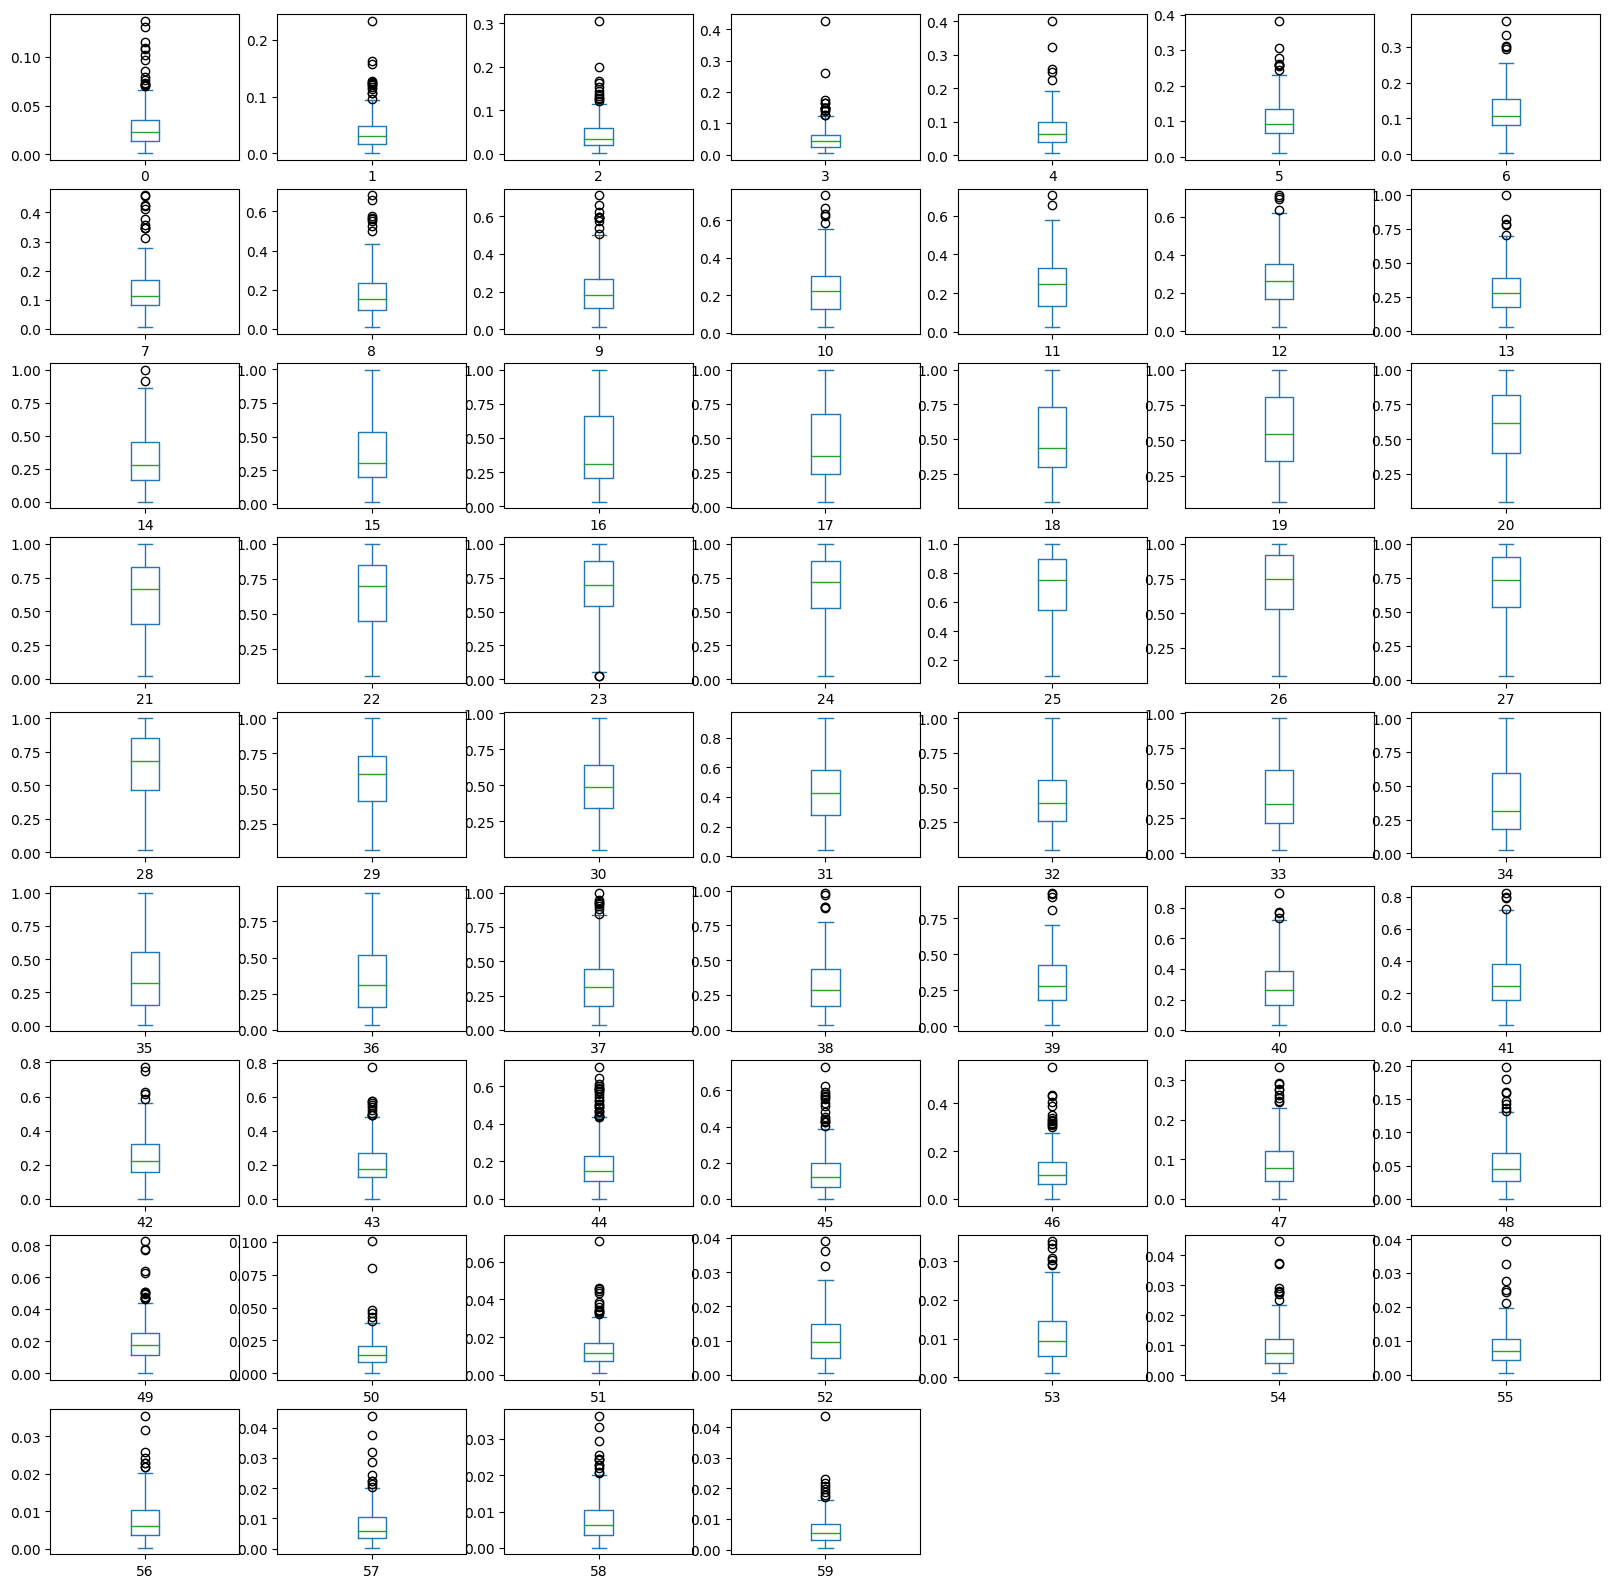

In [9]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
(dataset.plot(ax=ax, kind= 'box', subplots=True, layout=(9,7))
)
plt.show()

<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>

Importante: Hay un bug en Matplotlib y es por eso que hay que poner el `rename`. [Referencia 1](https://stackoverflow.com/questions/53385592/seaborn-issue-with-catplot) y [Referencia 2](https://stackoverflow.com/questions/59199393/i-get-an-error-when-i-use-boxplot-from-pandas-with-subplots)

Si no sale sin `rename` utiliza este código:
```python
    (dataset.rename(columns=lambda x: str(x))
        .plot(ax=ax, kind= 'box', subplots=True, layout=(9,7))
    )  
```
</div>

<a id="section311"></a>
### <font color="#004D7F"> Histograma</font>
También podemos crear un histograma de cada variable de entrada para tener una idea de la distribución. Parece que quizás dos de las variables de entrada tienen una distribución gaussiana. Es útil tener en cuenta que podemos usar algoritmos que pueden explotar esta suposición. 

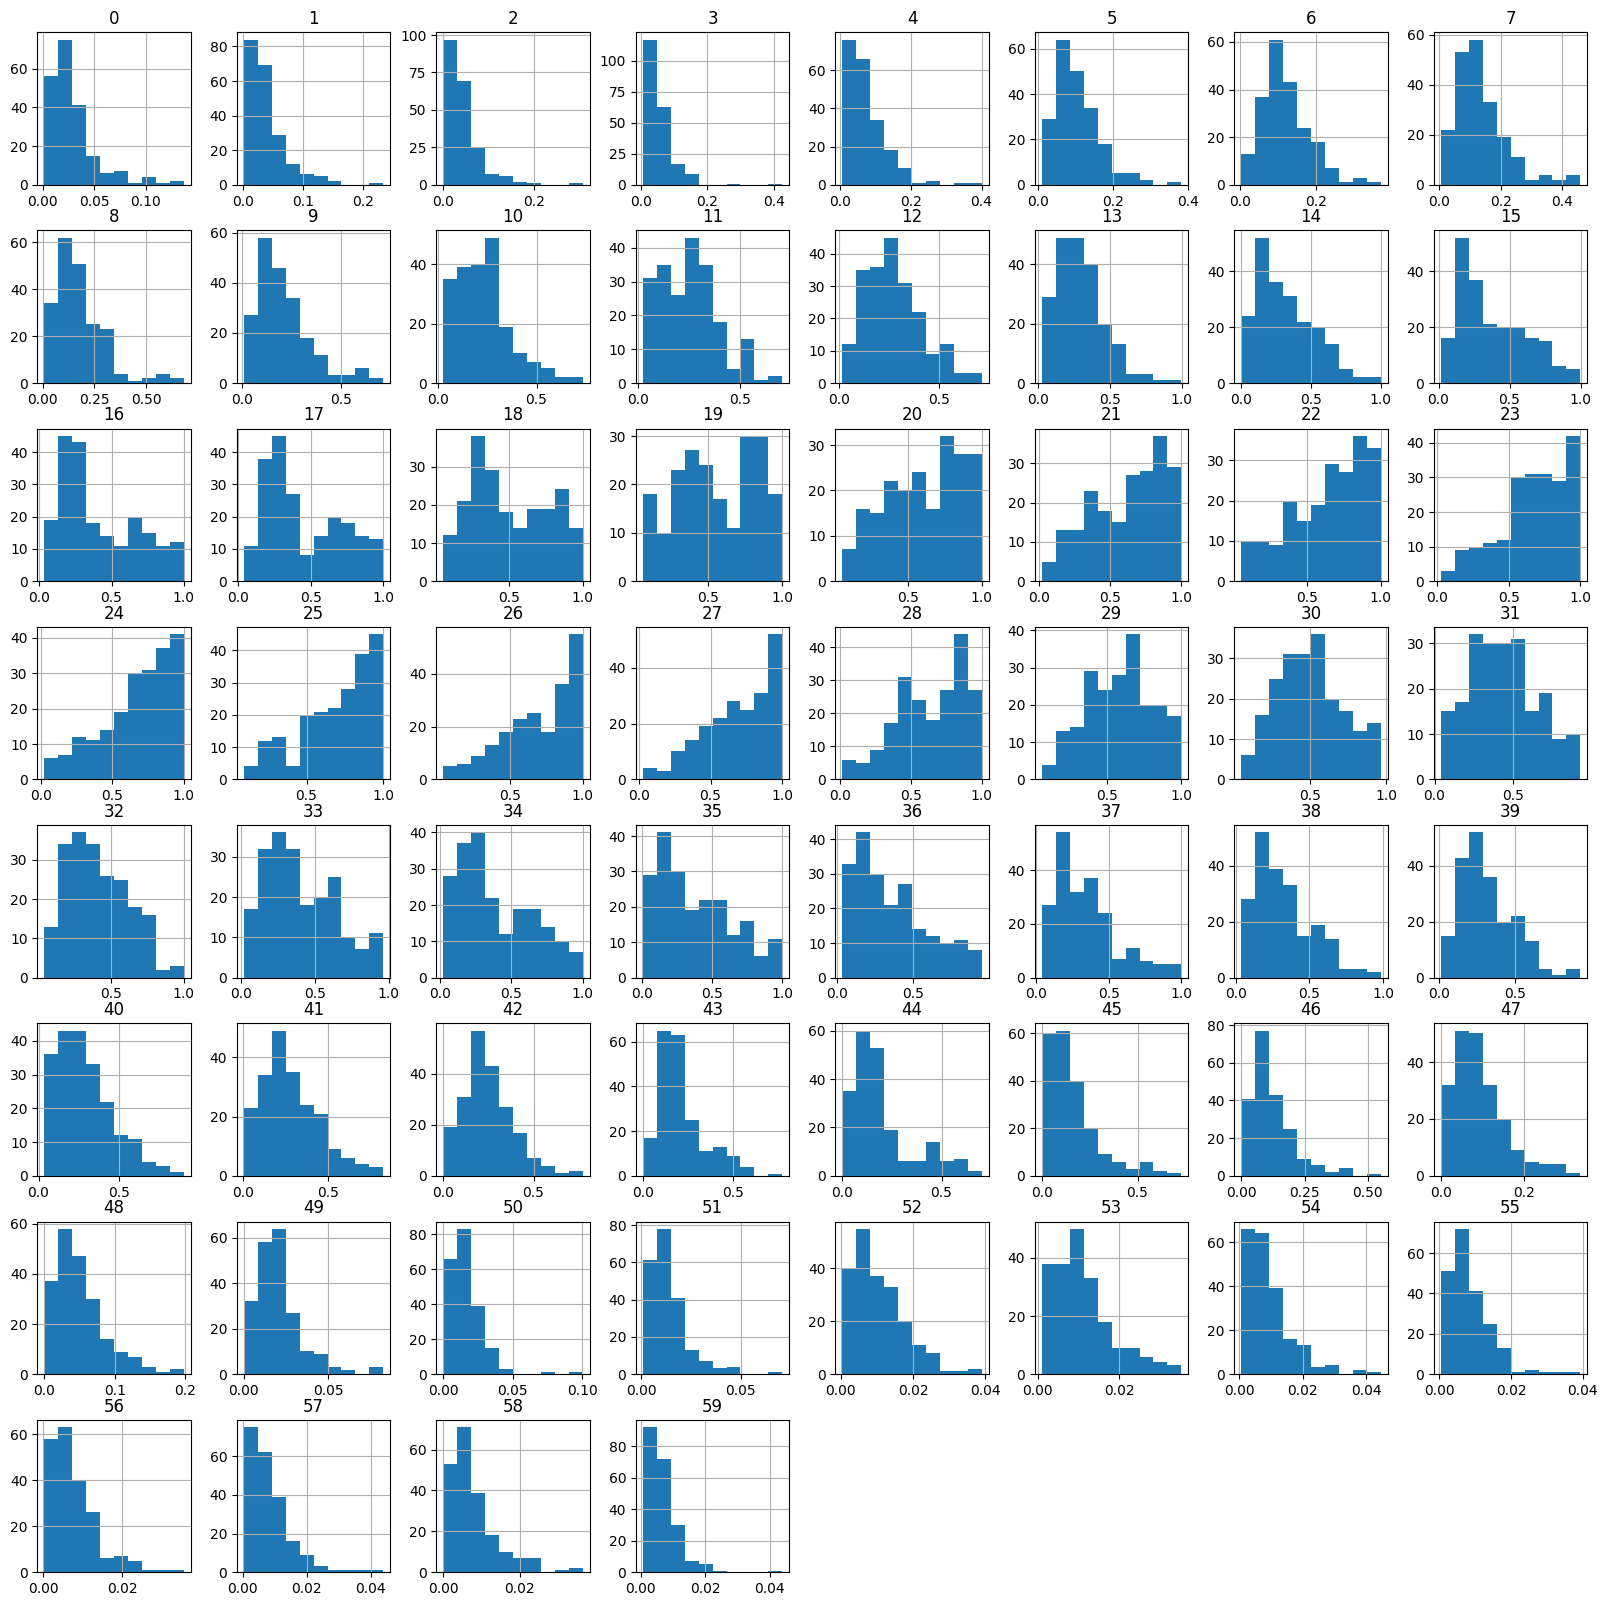

In [10]:
# histograms - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

<a id="section311"></a>
### <font color="#004D7F"> Diagrama de densidad</font>
Esto es útil, puede ver que muchos de los atributos tienen una distribución sesgada. Una transformación de potencia como una transformación de Box-Cox que puede corregir el sesgo en las distribuciones podría ser útil.

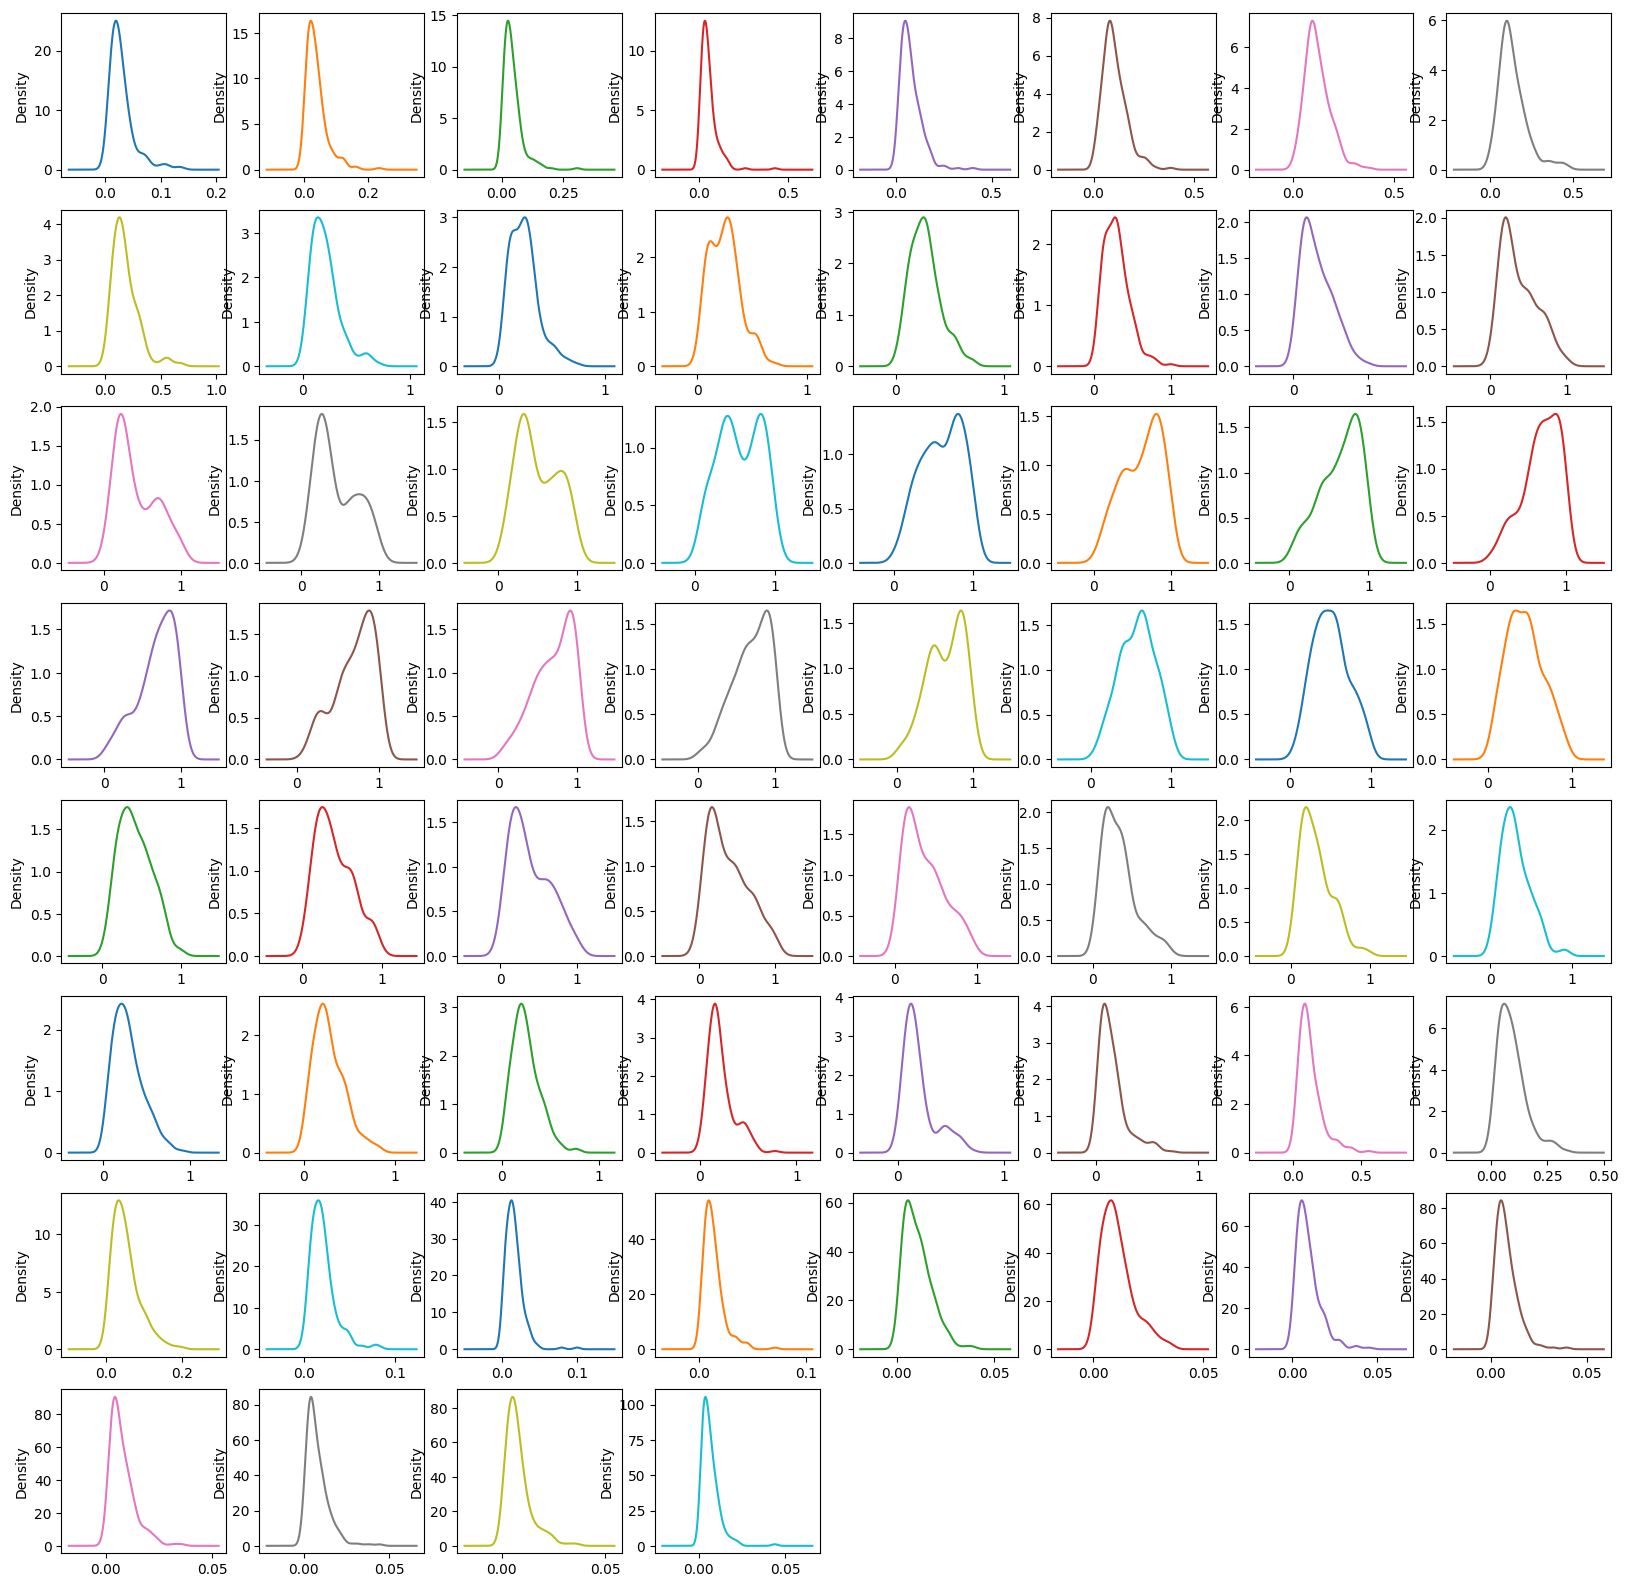

In [11]:
# density
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.plot(ax=ax, kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
plt.show()

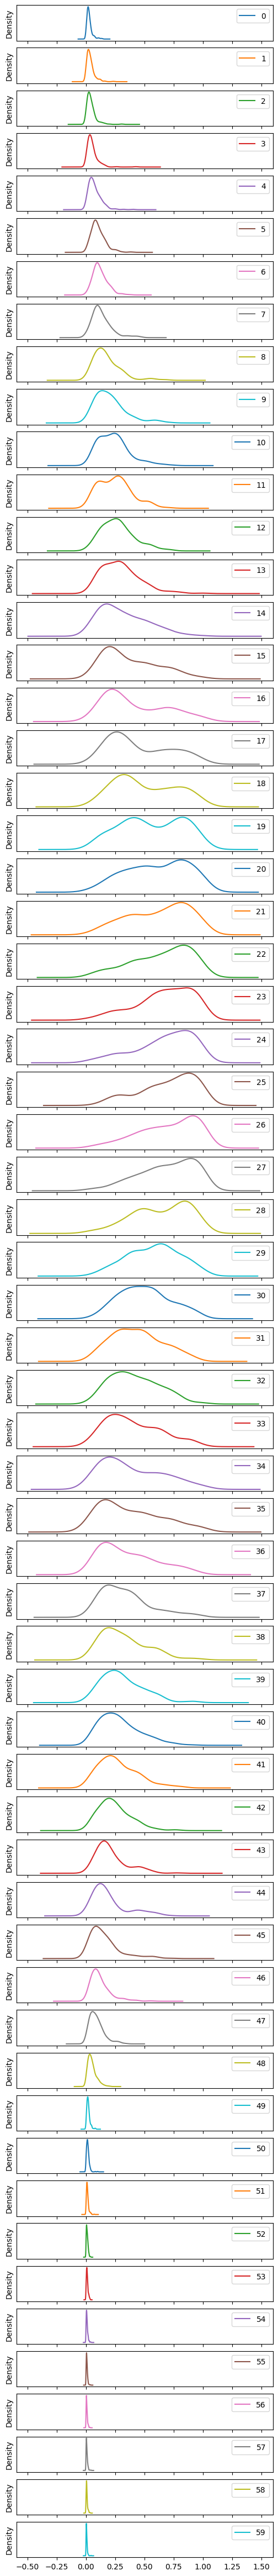

In [12]:
dataset.plot.density(figsize=(6, 60), subplots=True, yticks=[])
pass

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Ahora podemos ver las interacciones entre las variables. 

<a id="section321"></a>
### <font color="#004D7F"> Correlación entre atributos</font>
Parece que también hay alguna estructura en el orden de los atributos. El amarilo alrededor de la diagonal sugiere que los atributos que están uno al lado del otro generalmente están más correlacionados entre sí. Los parches azules también sugieren una correlación negativa moderada, los atributos adicionales están lejos unos de otros en el orden. Esto tiene sentido si el orden de los atributos se refiere al ángulo de los sensores para el sonido del sonar.

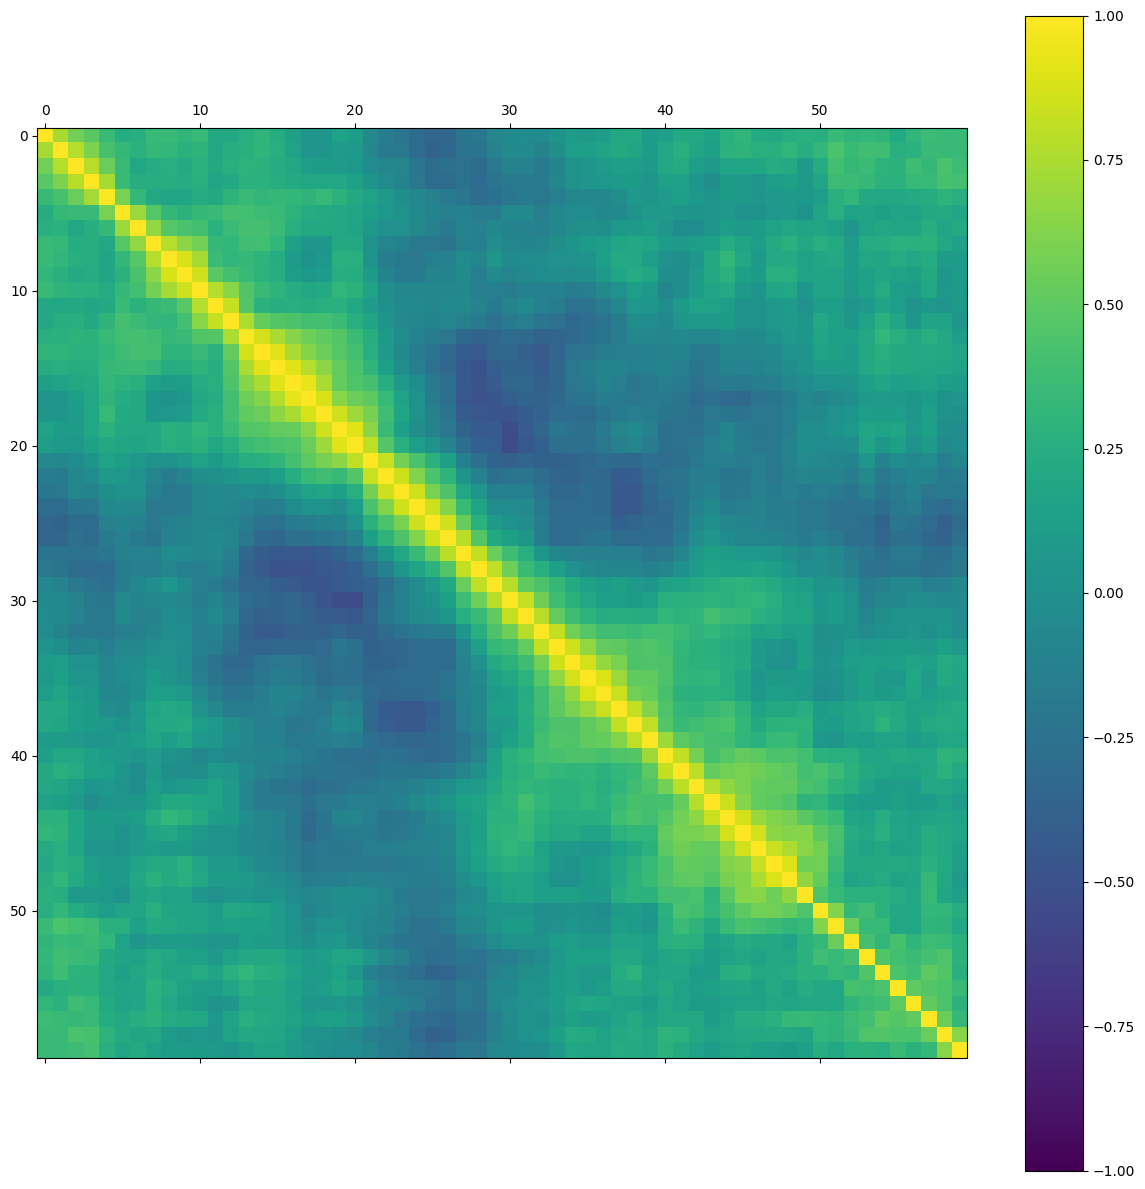

In [13]:
# correlation matrix
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

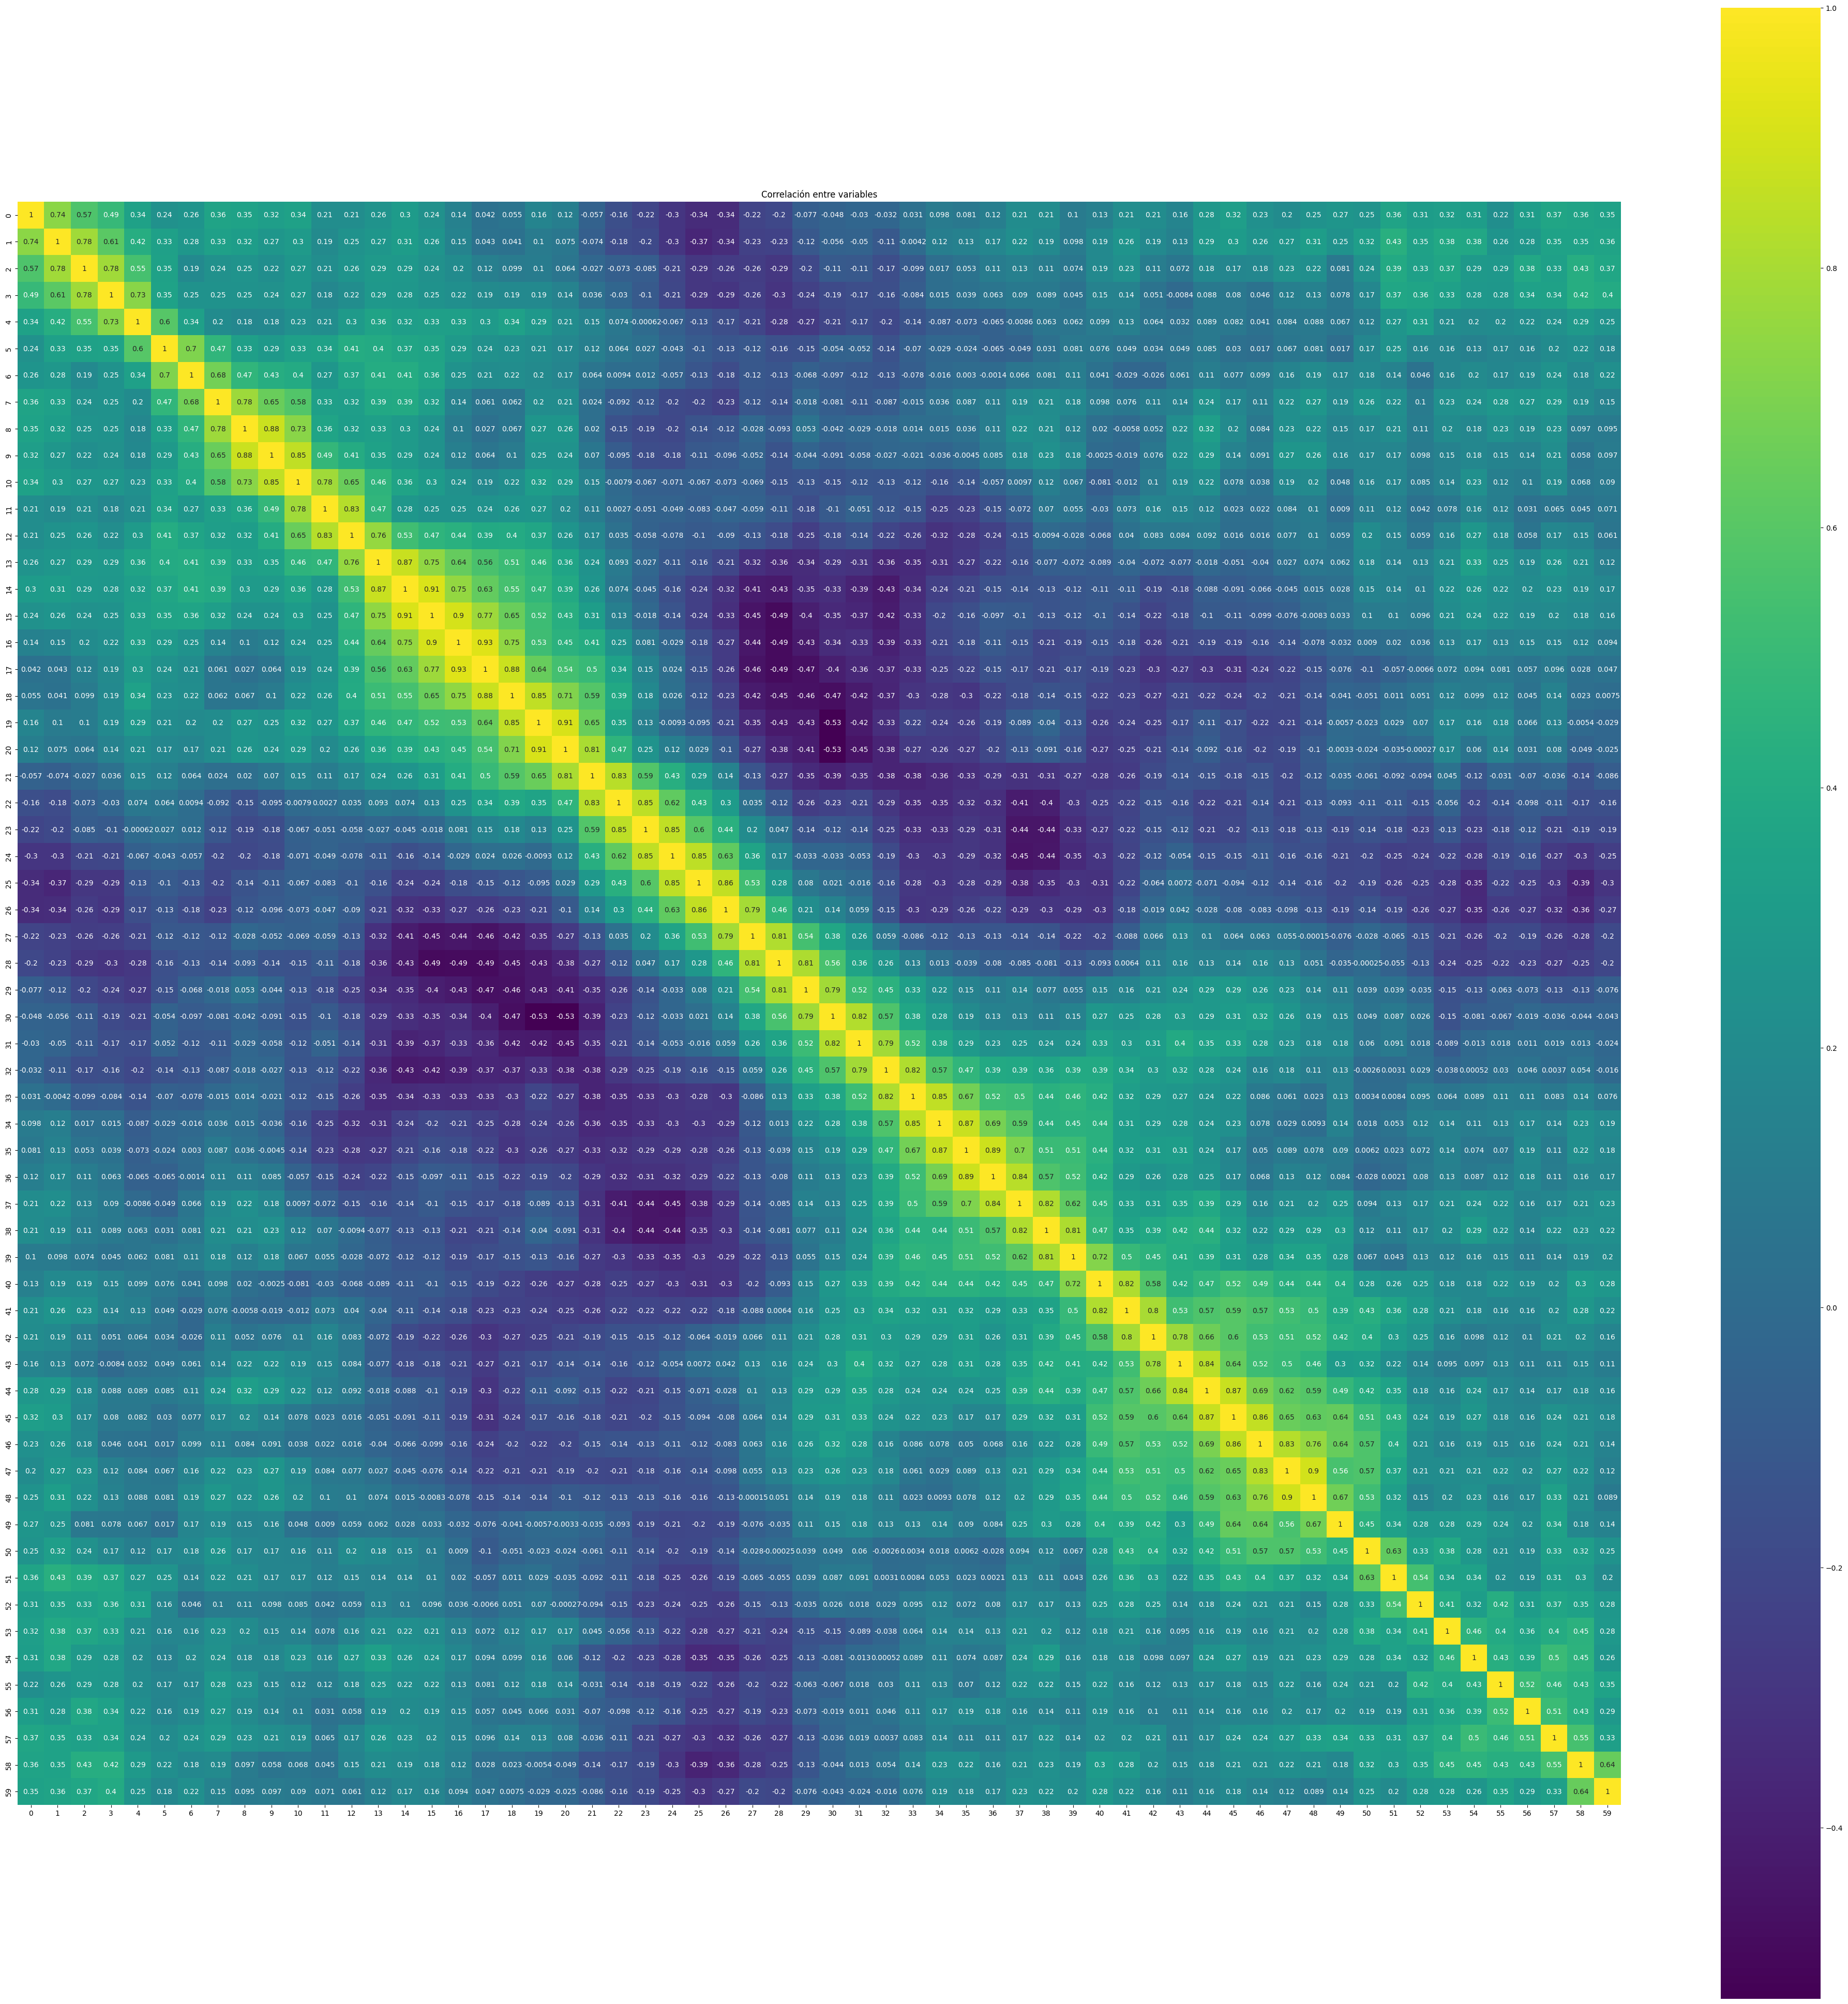

In [14]:
correlation = dataset.corr()
plt.figure(figsize=(50,50))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
# Esto se ponde debido al bug de Matplotlib 3.1.1 (quitarlo en versiones diferentes)
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
# ----------
plt.title('Correlación entre variables')
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

Ahora es el momento de crear algunos modelos de datos y estimar su Accruacy en datos no etiquetados. Esto es lo que vamos a cubrir en este paso:
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Estandarización.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

Es una buena idea utilizar un conjunto de validación. Esta es una muestra de los datos que retenemos de nuestro análisis y modelado. Lo usamos justo al final de nuestro proyecto para confirmar el Accuracy de nuestro modelo final. Es una prueba que podemos usar para ver si nos equivocamos y para darnos confianza en nuestras estimaciones de Accuracy en datos no etiquetados. Dividiremos el conjunto de datos cargado en dos, el 80% de los cuales utilizaremos para entrenar nuestros modelos y el 20% como un conjunto de datos de validación

In [15]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Ahora tiene datos de entrenamiento en `X_train` e `Y_train` para preparar modelos y conjuntos de `X_validation` e `Y_validation` que podemos usar más adelante.

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Evaluación de línea base</font>

No sabemos qué algoritmos funcionarán bien en este conjunto de datos. Podemos intuir que algoritmos basados en la distancia como $k$-NN y SVM pueden funcionar bien. Utilizaremos la validación cruzada 10 veces. El conjunto de datos no es demasiado pequeño y esta es una buena configuración estándar. Evaluaremos algoritmos utilizando la métrica Accuracy ya que las clases estaban balanceadas. Esta es una métrica general que dará una idea rápida de cuán correcto es un modelo dado. Más útil en problemas de clasificación binaria como este.

Posteriormente, creamos una línea base de rendimiento en este problema y verifiquemos varios algoritmos diferentes. Seleccionaremos un conjunto de algoritmos diferentes capaces de trabajar en este problema de clasificación. Los seis algoritmos seleccionados incluyen:
* __Algoritmos lineales:__ LoR y LDA.
* __Algoritmos no lineales:__ CART, SVM, NB y $k$-NN.

In [16]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Todos los algoritmos usan hiperparámetros predeterminados. Comparemos los algoritmos. Mostraremos la media y la desviación estándar de Accuracy para cada algoritmo a medida que lo calculemos y recopilemos los resultados para su uso posterior.

In [21]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LR: 77.76% (8.84%)
LDA: 77.87% (9.36%)
KNN: 75.88% (10.64%)
CART: 74.60% (11.16%)
NB: 68.27% (13.60%)
SVM: 76.51% (8.75%)


Estos son solo valores medios de Accuracy. Siempre es aconsejable observar la distribución de los valores de Accuracy calculados en los _folds_ de validación cruzada. Podemos hacerlo gráficamente usando Boxplot.

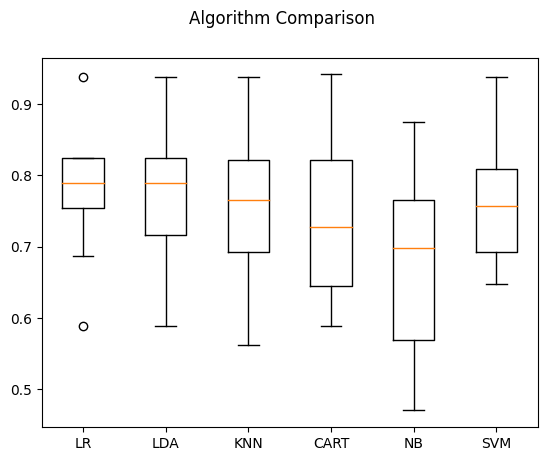

In [22]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados muestran una distribución estrecha de $k$-NN y SVM que es alentadora, lo que sugiere una baja variación. NB, además de tener un resultado malo tiene un varianza muy grande por lo que lo hace un algoritmo muy inconsisten para neustros datos. Sin embargo, $k$-NN tiene un comportamiento en cada _fold_ muy regular, lo que hace que sea un algoritmo óptimo.

Es posible que la distribución variada de los atributos tenga un efecto en el Accuracy de algoritmos como SVM. En la siguiente sección, repetiremos esta comprobación realizando una estandarización del conjunto de datos de entrenamiento.

<a id="section43"></a>
## <font color="#004D7F"> 4.3. Evaluar modelos: estandarización</font>

Sospechamos que las diferentes distribuciones de los datos en bruto pueden estar afectando negativamente a la habilidad de algunos de los algoritmos. Vamos a evaluar los mismos algoritmos con una copia estandarizada del conjunto de datos. Aquí es donde los datos se transforman de manera que cada atributo tenga un valor medio de cero y una desviación estándar de uno. 

También debemos evitar la fuga de datos cuando transformamos los datos. Una buena manera de evitar fugas es usar Pipelines que estandaricen los datos y construyan el modelo para cada _fold_ de la validación cruzada. De esa forma podemos obtener una estimación justa de cómo cada modelo con datos estandarizados podría funcionar en datos no vistos.

In [23]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLoR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaledk-NN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

ScaledLoR: 75.44% (6.79%)
ScaledLDA: 77.87% (9.36%)
Scaledk-NN: 80.85% (10.80%)
ScaledCART: 75.77% (9.73%)
ScaledNB: 68.27% (13.60%)
ScaledSVM: 82.61% (8.18%)


Ejecutar el ejemplo proporciona los resultados enumerados a continuación. Podemos ver que $k$-NN todavía está bien, incluso mejor que antes. También podemos ver que la estandarización de los datos ha elevado la habilidad de SVM para ser el algoritmo con mejor desempeño (aunque con más varianza que $k$-NN) probado hasta ahora.

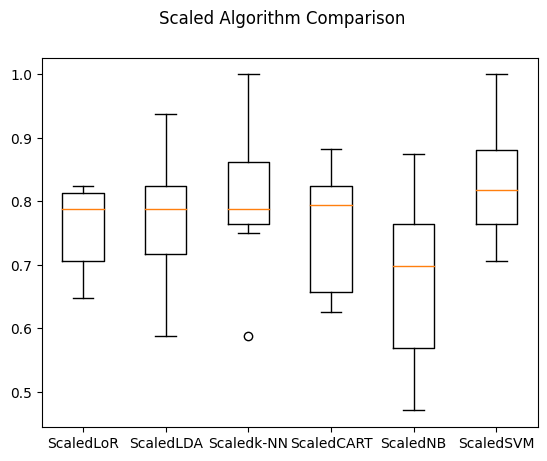

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados sugieren profundizar en los algoritmos SVM y $k$-NN. Es muy probable que una configuración más allá de la predeterminada pueda generar modelos con mejor desempeño.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section5"></a>
# <font color="#004D7F"> 5. Fase de Optimización</font>

En esta sección investigamos el ajuste de los parámetros para dos algoritmos que muestran mejores resultados, estos son: $k$-NN y SVM.

<a id="section51"></a>
## <font color="#004D7F"> 5.1. Optimización de $k$-NN</font>

Podemos comenzar ajustando el número de vecinos para $k$-NN. El número predeterminado de vecinos es 7. A continuación, probamos todos los valores impares de _k_ del 1 al 21, cubriendo el valor predeterminado de 7. Cada valor de _k_ se evalúa utilizando una validación cruzada 10 veces en el conjunto de datos estandarizado de entrenamiento. Podemos imprimir la configuración que resultó en el más alto Accuracy, así como la Accuracy de todos los valores probados. Ejecutando el ejemplo, vemos los resultados a continuación.

In [26]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Best: 0.836029 using {'n_neighbors': 1}
{'n_neighbors': 1}: 83.60% (7.95%)
{'n_neighbors': 3}: 81.36% (8.80%)
{'n_neighbors': 5}: 81.43% (9.69%)
{'n_neighbors': 7}: 77.76% (12.04%)
{'n_neighbors': 9}: 73.01% (9.94%)
{'n_neighbors': 11}: 74.15% (7.40%)
{'n_neighbors': 13}: 71.07% (10.58%)
{'n_neighbors': 15}: 72.32% (8.10%)
{'n_neighbors': 17}: 69.89% (7.27%)
{'n_neighbors': 19}: 71.07% (9.13%)
{'n_neighbors': 21}: 69.89% (9.12%)


Podemos ver que la configuración óptima es $k=1$. Esto es interesante ya que el algoritmo hará predicciones utilizando la instancia más similar en el conjunto de datos de entrenamiento solo.

<a id="section52"></a>
## <font color="#004D7F"> 5.2. Optimización de SVM</font>

Podemos ajustar dos parámetros clave del algoritmo SVM, el valor de _C_ (cuánto relajar el margen) y el tipo de _kernel_. El valor predeterminado para SVM (la clase SVC) es usar el _kernel_ de la función de base radial _(RBF)_ con un valor de _C_ establecido en 1.0. Al igual que con $k$-NN, realizaremos un `GridSearchCV` utilizando una validación cruzada de 10 con una copia estandarizada del conjunto de datos de entrenamiento. Intentaremos una serie de tipos de _kernel_ más simples y valores de _C_ con menos sesgo y más sesgo (menor que y más de 1.0 respectivamente). 

Ejecutar el ejemplo imprime la mejor configuración, la precisión y las precisiones para todas las combinaciones de configuración.

In [28]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Best: 0.850000 using {'C': 1.7, 'kernel': 'rbf'}
{'C': 0.1, 'kernel': 'linear'}: 74.85% (7.00%)
{'C': 0.1, 'kernel': 'poly'}: 58.27% (12.71%)
{'C': 0.1, 'kernel': 'rbf'}: 60.11% (18.44%)
{'C': 0.1, 'kernel': 'sigmoid'}: 71.29% (11.66%)
{'C': 0.3, 'kernel': 'linear'}: 75.44% (8.23%)
{'C': 0.3, 'kernel': 'poly'}: 64.41% (9.99%)
{'C': 0.3, 'kernel': 'rbf'}: 74.23% (8.19%)
{'C': 0.3, 'kernel': 'sigmoid'}: 74.85% (7.00%)
{'C': 0.5, 'kernel': 'linear'}: 76.58% (7.03%)
{'C': 0.5, 'kernel': 'poly'}: 70.48% (9.82%)
{'C': 0.5, 'kernel': 'rbf'}: 78.46% (6.89%)
{'C': 0.5, 'kernel': 'sigmoid'}: 76.07% (6.56%)
{'C': 0.7, 'kernel': 'linear'}: 75.99% (8.32%)
{'C': 0.7, 'kernel': 'poly'}: 75.96% (9.38%)
{'C': 0.7, 'kernel': 'rbf'}: 81.43% (5.98%)
{'C': 0.7, 'kernel': 'sigmoid'}: 76.10% (7.96%)
{'C': 0.9, 'kernel': 'linear'}: 76.54% (6.70%)
{'C': 0.9, 'kernel': 'poly'}: 78.97% (9.42%)
{'C': 0.9, 'kernel': 'rbf'}: 80.81% (6.29%)
{'C': 0.9, 'kernel': 'sigmoid'}: 76.07% (7.99%)
{'C': 1.0, 'kernel': 'linear

Podemos ver que la configuración más precisa fue SVM con un _kernel RBF_ y un valor _C_ de 2.0. La precisión del 86.7470% es aparentemente mejor de lo que $k$-NN podría lograr.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section6"></a>
# <font color="#004D7F"> 6. Algoritmos ensamblados</font>

Otra forma en que podemos mejorar el rendimiento de los algoritmos en este problema es mediante el uso de modelos ensamblados. En esta sección evaluaremos cuatro algoritmos ensamblados diferentes, dos tipo Boosting y dos tipo  Bagging:
* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM).
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

Utilizaresmo una validación cruzada de 10. No se utiliza la estandarización de datos en este caso porque los cuatro algoritmos de conjunto se basan en árboles de decisión que son menos sensibles a las distribuciones de datos.

In [30]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.stdev()*100.0:,.2f}%)")

AB: 73.01% (5.66%)
GBM: 73.01% (5.66%)
RF: 73.01% (5.66%)
ET: 73.01% (5.66%)


Podemos ver que ambas técnicas proporcionan puntajes de Accuracy bajos (por debajo de 80%) con configuraciones predeterminadas. Podemos trazar la distribución de puntajes de Accruacy en los _folds_ de validación cruzada.

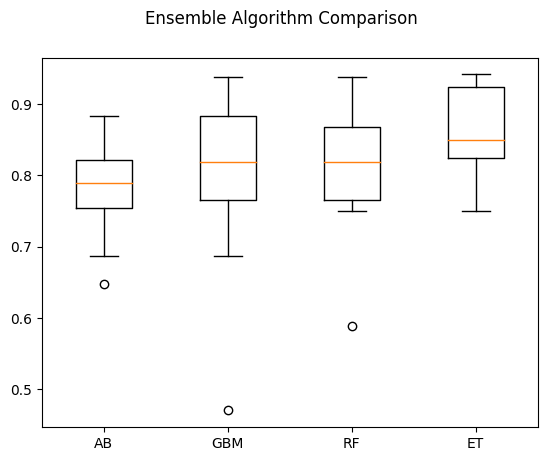

In [31]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados sugieren que GBM puede ser digno de un estudio adicional, con una media fuerte y una extensión que se inclina hacia el 90% de Accuracy.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section7"></a>
# <font color="#004D7F"> 7. Fase de Forecasting</font>

El SVM mostró el mejor resultado como un modelo estable y de baja complejidad para este problema. En esta sección finalizaremos el modelo entrenándolo en todo el conjunto de datos de entrenamiento y haremos predicciones para el conjunto de datos de validación para confirmar nuestros hallazgos. 

Una parte de los resultados fue que SVM funciona mejor cuando el conjunto de datos está estandarizado, de modo que todos los atributos tienen un valor medio de cero y una desviación estándar de uno. Podemos calcular esto a partir del conjunto de datos de entrenamiento completo y aplicar la misma transformación a los atributos de entrada del conjunto de datos de validación.

In [32]:
# Finalize Model
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



Podemos ver que alcanzamos una precisión de casi el 86% en el conjunto de datos de validación extendido. Una puntuación que coincide estrechamente con nuestras expectativas estimadas anteriormente durante el ajuste de SVM.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>